# Evolutionary algorithms

**1) Genetic algorithm**

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
DIM = 100

Fitness function definition (will be maximized instead of minimized)

In [55]:
def fitness(x: np.array) -> int:
    if len(x) != DIM:
        raise ValueError(f'x should be a {DIM} dimensional binary vector')
    result = sum(x[:int(DIM/2)])
    result -= sum(x[int(DIM/2):]) - int(DIM/2)
    return int(DIM - result) 

Define the parameters

In [56]:
population_size = 50
crossover_rate = .9
mutation_rate = .05

Generate random initial population

In [70]:
population = [np.random.randint(2, size=DIM) for i in range(population_size)]

Do the evolution

In [58]:
def roulette_wheel(fitnesses: np.array) -> int:
    """Selects random indice based on fitness array (biggeer fitness == bigger probability)"""
    i = 0
    curr_sum = 0
    random = np.random.rand() * sum(fitnesses)
    while i < len(fitnesses) and curr_sum < random:
        curr_sum += fitnesses[i]
        i += 1
    return i - 1

In [71]:
def get_best_solution(max_epochs: int, best_fitness: int, population: np.array) -> np.array, np.array:
    fitness_history = []
    for i in range(max_epochs + 1):
        fitnesses = [fitness(x) for x in population]
        fitness_history.append(np.mean(fitnesses))
        new_population = []
        if max(fitnesses) == best_fitness:
#             Reached best possible fitness, quit evolving
            break
        for j in range(len(population)):
#             Select two parrents, and start creating a candidate child gene by gene
            father, mother = roulette_wheel(fitnesses), roulette_wheel(fitnesses)
            candidate = np.zeros(DIM)
            for k in range(DIM):
# If we're doing a crossover, copy a gene from one of the parrents randomly
                if np.random.rand() < crossover_rate:
                    candidate[k] = population[father][k] if np.random.rand() > .5 else population[mother][k]
                else:
#             No crossover - keep the gene intact
                    candidate[k] = population[j][k]
#  Mutations, if they happen, flip the gene regardless of crossover
                if np.random.rand() < mutation_rate:
                    candidate[k] = 1 - candidate[k]
#     Keep the child only if it's better than the previous population member
# (approach similar to simulated annealing could be used here - accepting also worse members with decreasing prob.)
            if fitness(candidate) < fitness(population[j]):
                candidate = population[j]
            new_population.append(candidate)
        population = new_population
# Return best solution from the last iteration, and fitness history to plot later
    return population[np.argmax(fitnesses)], fitness_history

In [72]:
solution, fitness_history = get_best_solution(max_epochs=1000, best_fitness=DIM, population=population)

In [73]:
solution

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Plot the population mean fitness development throughout training

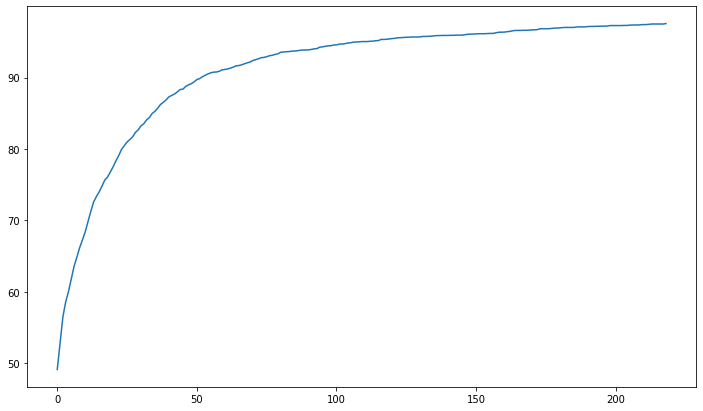

In [74]:
plt.figure(figsize=(12, 7))
plt.plot(fitness_history)
plt.show()

In [75]:
fitness(solution)

100

**2) Differential evolution**

Function to minimize

In [1]:
def schwefel_fun(x: float, y: float) -> float:
    result = x * np.sin(np.sqrt(np.abs(x))) + y * np.sin(np.sqrt(np.abs(y)))
    return 837.9658 - result

Initial population

In [154]:
population_size = 50

In [155]:
population = [1000 * np.random.rand(2) - 500 for i in range(population_size)]

Plot the fitness landscape

In [150]:
x_samples, y_samples = np.arange(-500, 500, .5), np.arange(-500, 500, .5)

In [151]:
X,Y = np.meshgrid(x_samples, y_samples)

In [152]:
Z = np.array([[schwefel_fun(x, y) for x, y in zip(X_arr, Y_arr)] for X_arr, Y_arr in zip(X, Y)])

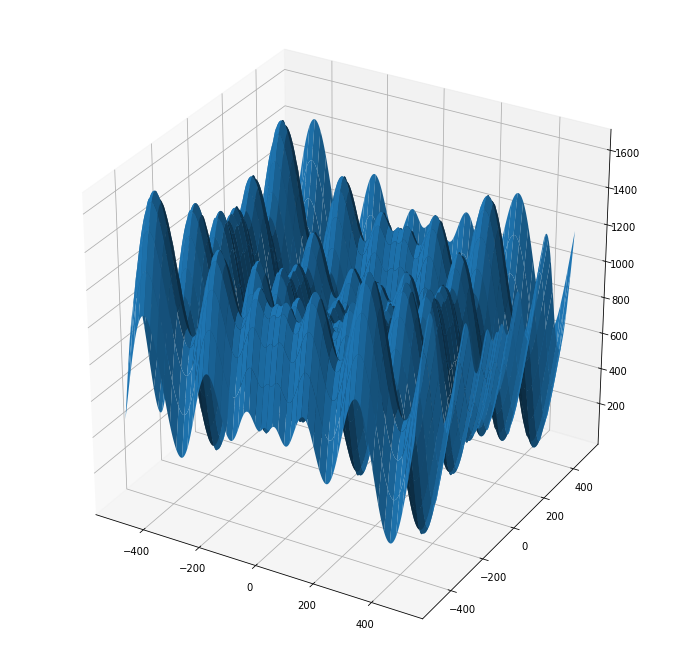

In [153]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, Z)

plt.show()


Do the evolution

In [173]:
def get_best_solution(max_epochs: int, population: np.array, recombination_prob = .8, F = .5):
    fitness_history = []
    for i in range(max_epochs + 1):
        fitnesses = [schwefel_fun(x[0], x[1]) for x in population]
        fitness_history.append(np.mean(fitnesses))
        new_population = []
        for j in range(len(population)):
#           Select three random vectors to create a donor vector
            random_vector_indices = np.random.randint(len(population), size=3)
            random_vectors = [population[idx] for idx in random_vector_indices]
            donor = random_vectors[0] + F * (random_vectors[1] - random_vectors[2])
#           Clip the donor to make sure that solution will not get outside its space 
            donor = np.clip(donor, -500, 500) #(these should be parameters not hard-coded)
            if np.random.rand() > recombination_prob:
# Simplification for 2-dimensional solutions: One of the donor's genes is always kept,
# the other is changed back to original if random doesnt match recombination prob.   
                change_dim = round(np.random.rand())
                donor[change_dim] = population[j][change_dim]
# Select recombined donor for new population only if fitness is better, else keep the previous vector
            new_population.append(donor if schwefel_fun(donor[0], donor[1]) < schwefel_fun(population[j][0], population[j][1]) 
                                  else population[j])
        population = new_population
    
    return population[np.argmin(fitnesses)], fitness_history

In [177]:
solution, fitness_history = get_best_solution(max_epochs=100, population=population)

In [3]:
schwefel_fun(420.96874689, 420.96874689)

2.545513257246057e-05

In [4]:
solution, schwefel_fun(solution[0], solution[1])

array([420.96874689, 420.96874627]), 2.545513257246057e-05


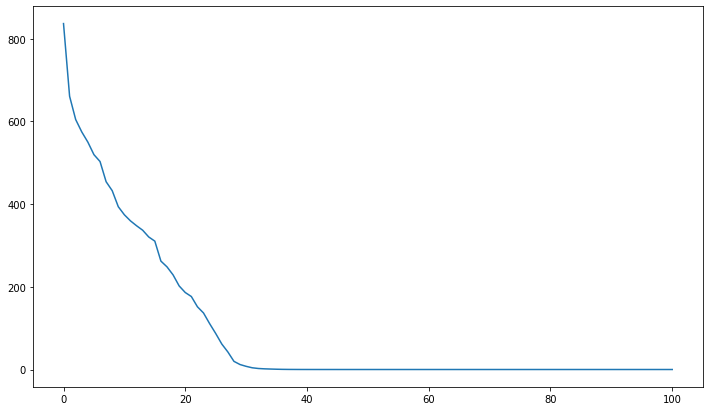

In [180]:
plt.figure(figsize=(12, 7))
plt.plot(fitness_history)
plt.show()